<a href="https://colab.research.google.com/github/Samuel-Buarque/Lung_cancer_prediction_model/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load the dataset
file_path = "/content/survey_lung_cancer.csv"
df = pd.read_csv(file_path)


In [ ]:
# Show the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0          

In [ ]:

# Encode the target variable (LUNG_CANCER)
label_encoder = LabelEncoder()
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [ ]:

# Encode the categorical feature (GENDER)
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

In [ ]:
# Encode the categorical feature (GENDER)
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

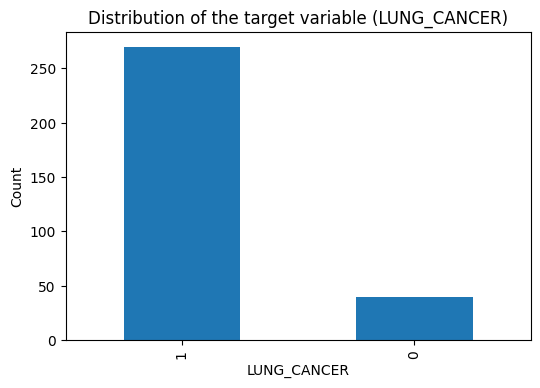

In [ ]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6,4))
df['LUNG_CANCER'].value_counts().plot(kind='bar')
plt.title('Distribution of the target variable (LUNG_CANCER)')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Count')
plt.show()

In [ ]:
# Define feature columns and target column
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']


In [ ]:

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


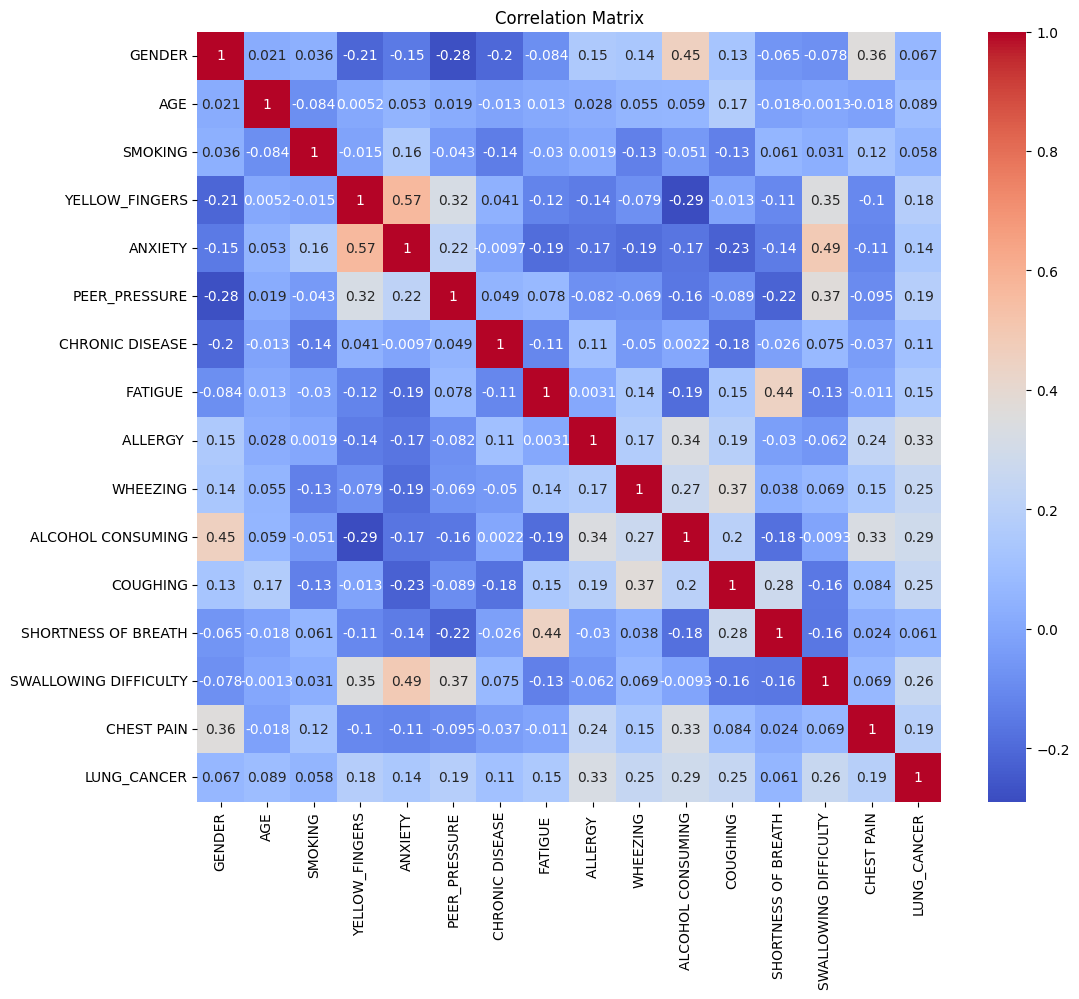

In [ ]:

# Visualize the correlation matrix
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Split the data into training and testing sets
# Here, 80% of the data is used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert target variable to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
# Define the MLP model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 [==============================] - 1s 15ms/step - loss: 0.6513 - accuracy: 0.7462 - val_loss: 0.4518 - val_accuracy: 0.9000
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5143 - accuracy: 0.8325 - val_loss: 0.3704 - val_accuracy: 0.9200
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.8325 - val_loss: 0.3184 - val_accuracy: 0.9200
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3857 - accuracy: 0.8325 - val_loss: 0.2857 - val_accuracy: 0.9200
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3466 - accuracy: 0.8376 - val_loss: 0.2607 - val_accuracy: 0.9000
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8528 - val_loss: 0.2406 - val_accuracy: 0.9000
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2873 - accuracy: 0.8629 - val_loss: 0.2276 - val_accuracy: 0.9200
Epoch 8/50
20/20 [=

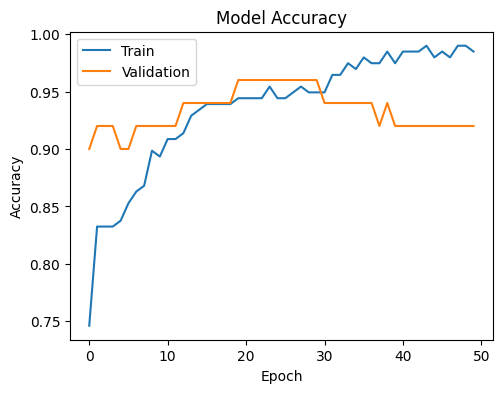

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


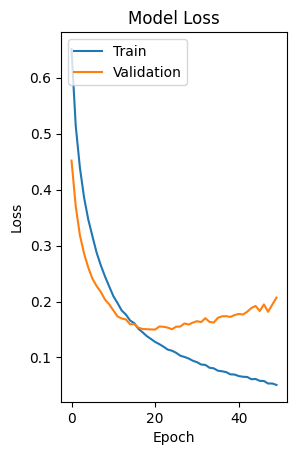

In [ ]:

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Loss: 0.13224540650844574, Accuracy: 0.9516128897666931


In [ ]:
# Display statistical summary of the dataset
print(df.describe())

           GENDER         AGE     SMOKING  YELLOW_FINGERS     ANXIETY  \
count  309.000000  309.000000  309.000000      309.000000  309.000000   
mean     0.524272   62.673139    1.563107        1.569579    1.498382   
std      0.500221    8.210301    0.496806        0.495938    0.500808   
min      0.000000   21.000000    1.000000        1.000000    1.000000   
25%      0.000000   57.000000    1.000000        1.000000    1.000000   
50%      1.000000   62.000000    2.000000        2.000000    1.000000   
75%      1.000000   69.000000    2.000000        2.000000    2.000000   
max      1.000000   87.000000    2.000000        2.000000    2.000000   

       PEER_PRESSURE  CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  \
count     309.000000       309.000000  309.000000  309.000000  309.000000   
mean        1.501618         1.504854    1.673139    1.556634    1.556634   
std         0.500808         0.500787    0.469827    0.497588    0.497588   
min         1.000000         1.000

<Figure size 1000x800 with 0 Axes>

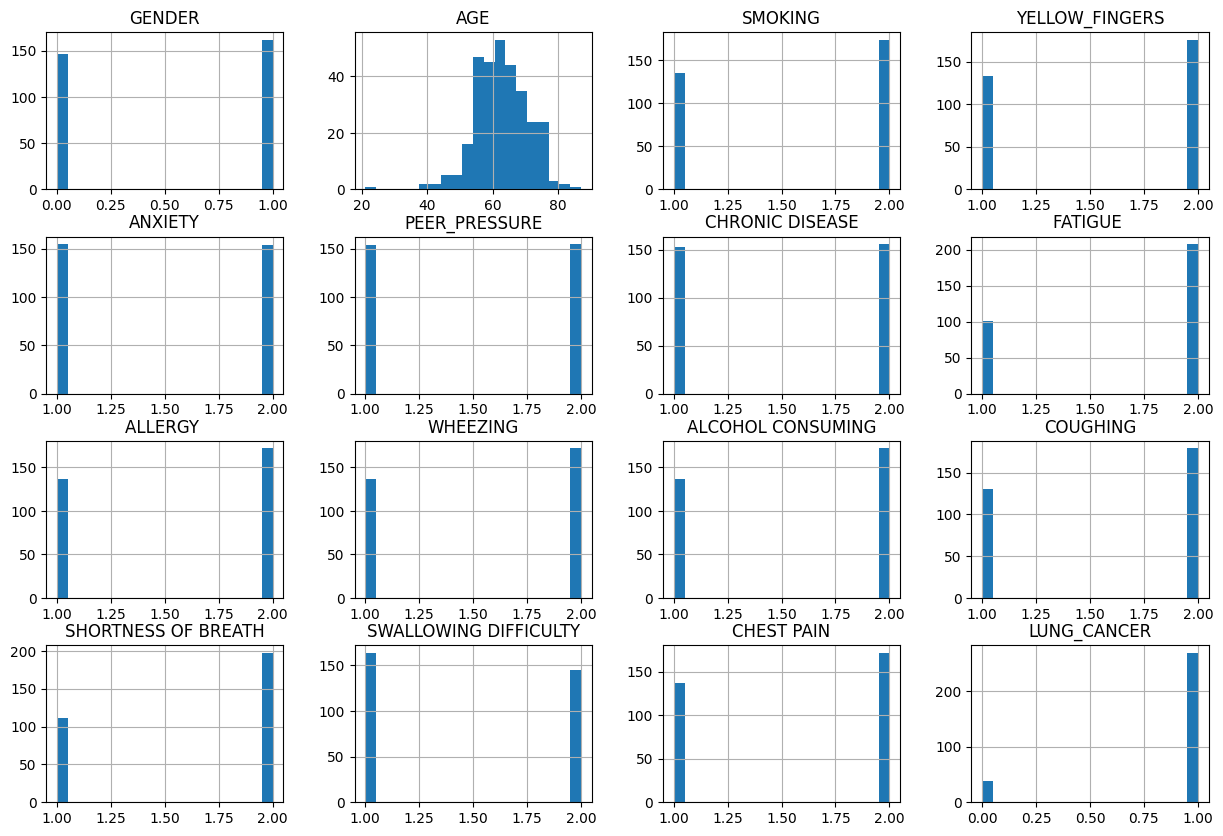

In [ ]:
# Plot distribution of key features
plt.figure(figsize=(10, 8))
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [ ]:
# Encode categorical variables
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

In [ ]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Define the MLP model
model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 [==============================] - 3s 53ms/step - loss: 0.7867 - accuracy: 0.4619 - val_loss: 0.6214 - val_accuracy: 0.6600
Epoch 2/50
20/20 [==============================] - 0s 11ms/step - loss: 0.5771 - accuracy: 0.7360 - val_loss: 0.4673 - val_accuracy: 0.8600
Epoch 3/50
20/20 [==============================] - 0s 11ms/step - loss: 0.4606 - accuracy: 0.8274 - val_loss: 0.3878 - val_accuracy: 0.8800
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 0.3945 - accuracy: 0.8426 - val_loss: 0.3378 - val_accuracy: 0.8800
Epoch 5/50
20/20 [==============================] - 0s 11ms/step - loss: 0.3524 - accuracy: 0.8477 - val_loss: 0.3009 - val_accuracy: 0.8600
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.3215 - accuracy: 0.8477 - val_loss: 0.2786 - val_accuracy: 0.9000
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2972 - accuracy: 0.8477 - val_loss: 0.2597 - val_accuracy: 0.9000
Epoch 8/50
20/20

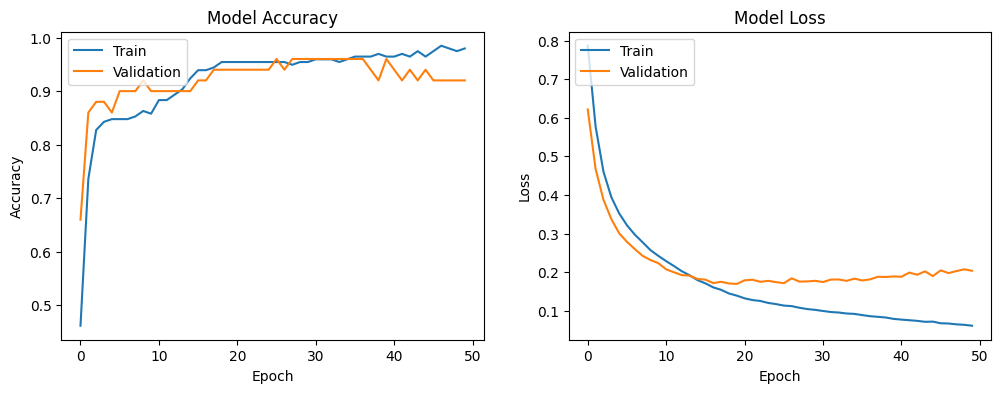

In [ ]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

2/2 [==============================] - 0s 9ms/step


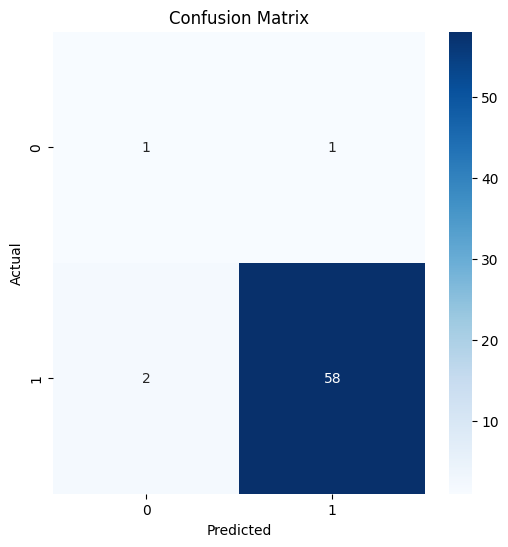

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()